# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.002
-0.002
-0.002
0.0
-0.001
-0.004
-0.004
0.982
0.984
0.985
0.984
0.984
1.97
1.973
1.974
1.973
1.974
2.969
2.971
2.973
2.971
2.972
3.957
3.959
3.96
3.959
3.96
4.954
4.957
4.958
4.958
4.957
4.957
5.958
5.957
5.957
6.7
6.7
6.7
6.7
7.435
7.437
7.438
7.437
7.438
8.434
8.438
8.438
8.437
8.438
9.435
9.439
9.44
9.439
9.438
10.433
10.437
10.438
10.437
10.437
11.434
11.439
11.438
11.438
11.439
12.436
12.44
12.44
12.439
12.439
13.437
13.439
13.441
13.44
13.44
14.176
14.18
14.181
14.18
14.181
14.912
14.914
14.916
14.916
14.916
15.916
15.916
15.915
15.914
16.911
16.915
16.914
16.913
16.915
17.906
17.911
17.91
17.908
17.908
18.907
18.907
18.906
18.906
19.904
19.904
19.902
19.904
20.893
20.895
20.896
20.895
20.895
21.617
21.62
21.621
21.62
21.621
22.352
22.352
22.351
22.351
23.351
23.351
23.35
23.35
24.354
24.354
24.352
24.352
25.354
25.354
25.352
25.352

57.236
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.235
57.234
57.234
57.234
57.233
57.233
57.233
57.233
57.233
57.452
57.452
57.452
57.451
57.452
57.452
57.452
57.452
57.452
57.452
57.425
57.497
57.497
57.497
57.497
57.496
57.496
57.496
57.495
57.495
57.495
57.495
57.495
57.495
57.495
57.494
57.493
57.493
57.494
57.494
57.494
57.494
57.493
57.493
57.492
57.492
57.492
57.492
57.493
57.493
57.494
57.494
57.492
57.492
57.492
57.492
57.492
57.491
57.491
57.491
57.488
57.564
57.564
57.564
57.627
57.627
57.626
57.626
57.689
57.689
57.689
57.689
57.689
57.688
57.687
57.69
57.689
57.688
57.688
57.688
57.688
57.686
57.686
57.686
57.686
57.686
57.686
57.686
57.686
57.686
57.686
57.685
57.685
57.685
57.685
57.685
57.685
57.685
57.685
57.684
57.683
57.682
57.683
57.683
57.684
57.684
57.684
57.684
57.684
57.684
57.684
57.684
57.683
57.683
57.683
57.682
57.681
57.681
57.904
57.939
57.939
57.939
57.939
57.938
57.938
57.938
57.938
57.939
57.938
57.938
57.938


KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1468,2936,60.018
1469,2938,60.018
1470,2940,60.017
1471,2942,60.017


<IPython.core.display.Javascript object>


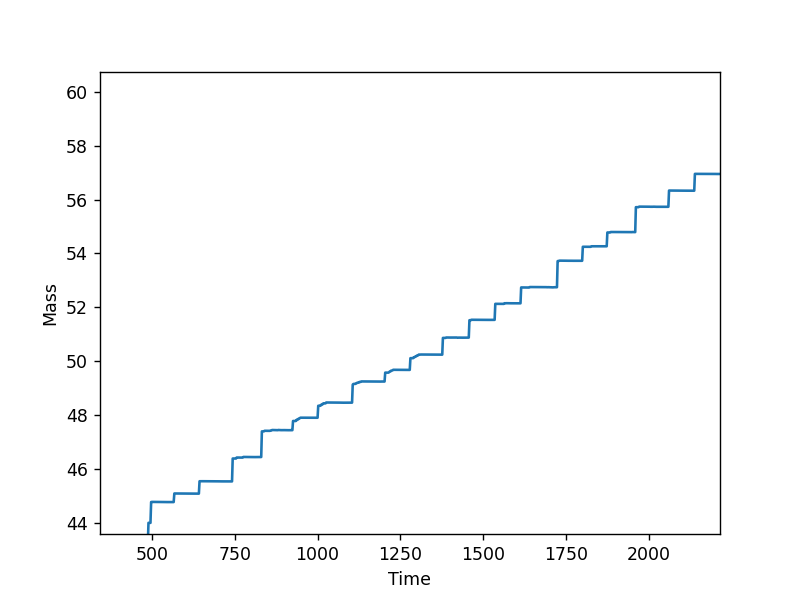

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_080523_S391-396.csv')